<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-normal-n-0-6-9-15-r9.csv?token=AKVFSOF2K7TSMQEJ7NI7IAK64ICOQ')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-1-11-r9.csv?token=AKVFSOCJJV7I2TLHU7QMFRC64ICOW')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,9,9,23,7,3,3,0,0.000000,4,96,1,96,96,0,12,3,27,1
1,7,2,0,1,1,4,3,9,9,9,23,7,4,3,0,0.000000,4,105,1,105,105,0,16,3,27,0
2,106,4,2,1,1,4,3,9,11,11,24,8,8,3,2,0.666667,12,104,2,105,208,8,32,3,27,0
3,106,0,3,4,1,1,5,17,23,7,9,9,3,3,3,1.000000,16,95,2,96,190,0,12,20,340,1
4,107,0,3,4,2,2,5,17,23,7,9,9,3,3,3,1.000000,17,94,3,96,282,0,48,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296090,3278657,3,1,1,1,4,3,10,15,15,17,1,60214,5,4,0.800000,44,1,7,7,7,3,240856,3,30,0
296091,3279282,4,2,6,1,1,3,9,27,11,24,8,60219,3,2,0.666667,12,4,1,4,4,8,361314,18,162,0
296092,3279289,4,2,6,2,2,3,9,27,11,24,8,60219,3,2,0.666667,19,3,2,4,6,8,1445256,18,162,0
296093,3279296,4,2,6,3,2,3,9,27,11,24,8,60219,3,2,0.666667,26,2,3,4,6,8,2167884,18,162,0


In [6]:
df.shape

(296095, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-1-12-r9.csv?token=AKVFSOGTVH2QWJI32FP6WOC64ICO2')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-1-7-r9.csv?token=AKVFSOD3QJE3XVUWKCDOMPC64ICO6')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-11-12-r9.csv?token=AKVFSOBUDSDSNEWLAJDABC264ICPE')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-7-11-r9.csv?token=AKVFSOECRP4HXQX4ENUBQZC64ICPK')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r9/4-fft-malicious-n-0-6-9-15-m-7-12-r9.csv?token=AKVFSOE7BVO6CPCMR5SKKDC64ICPO')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(166846, 26)
(163045, 26)
(170077, 26)
(166542, 26)
(158936, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.376684,0.135774,0.007030,-0.010756,-0.380909,-0.356586,0.061326,0.243706,-0.274474,-0.575252,0.185827,0.025678,0.016103,0.031856,0.038723,0.540494,0.093876,-0.185328,-0.330526,-0.081260
inport,-0.376684,1.000000,-0.151478,0.016782,-0.025649,0.619396,0.532555,0.022344,0.163779,0.405297,0.574565,-0.265211,0.020862,0.050484,0.054398,0.051864,0.466054,-0.042354,0.360114,0.543640,-0.058368
cache_coherence_type,0.135774,-0.151478,1.000000,0.208223,-0.318248,-0.254814,-0.289591,0.032956,-0.072349,-0.015646,-0.022253,-0.174763,0.016533,-0.015261,0.000969,0.004194,-0.005670,0.285592,0.646773,0.111391,-0.001516
flit_id,0.007030,0.016782,0.208223,1.000000,0.001238,0.202118,0.187213,0.000855,0.014960,-0.001003,-0.003950,0.378709,-0.016108,0.010531,-0.004252,-0.003344,0.011340,0.639045,0.335934,0.284946,0.001371
flit_type,-0.010756,-0.025649,-0.318248,0.001238,1.000000,-0.308898,-0.286116,-0.001328,-0.022867,0.001527,0.006032,0.423649,-0.016483,0.025477,0.006858,0.005847,-0.017344,0.151902,-0.513428,-0.435492,-0.002087
vnet,-0.380909,0.619396,-0.254814,0.202118,-0.308898,1.000000,0.976611,-0.026858,0.140776,0.212278,0.339736,-0.397398,-0.016116,0.024367,0.006291,0.000358,0.153409,-0.048199,0.572700,0.926828,0.005202
vc,-0.356586,0.532555,-0.289591,0.187213,-0.286116,0.976611,1.000000,-0.033155,0.096399,0.120343,0.249254,-0.384210,-0.014980,0.030242,0.011636,0.004240,0.096356,-0.062905,0.524770,0.911444,0.011773
traversal_id,0.061326,0.022344,0.032956,0.000855,-0.001328,-0.026858,-0.033155,1.000000,0.019025,0.003083,-0.013813,0.028776,0.172683,0.173704,0.264101,0.202241,0.085642,0.553056,0.006755,-0.018415,-0.319260
hop_count,0.243706,0.163779,-0.072349,0.014960,-0.022867,0.140776,0.096399,0.019025,1.000000,0.497775,0.040827,0.090546,-0.040536,-0.048044,-0.067538,-0.053743,0.482045,-0.012120,0.049699,0.096119,-0.058634
current_hop,-0.274474,0.405297,-0.015646,-0.001003,0.001527,0.212278,0.120343,0.003083,0.497775,1.000000,0.801762,0.214849,-0.024394,-0.041458,-0.050209,-0.038124,0.138324,-0.013393,0.154163,0.168684,-0.027241


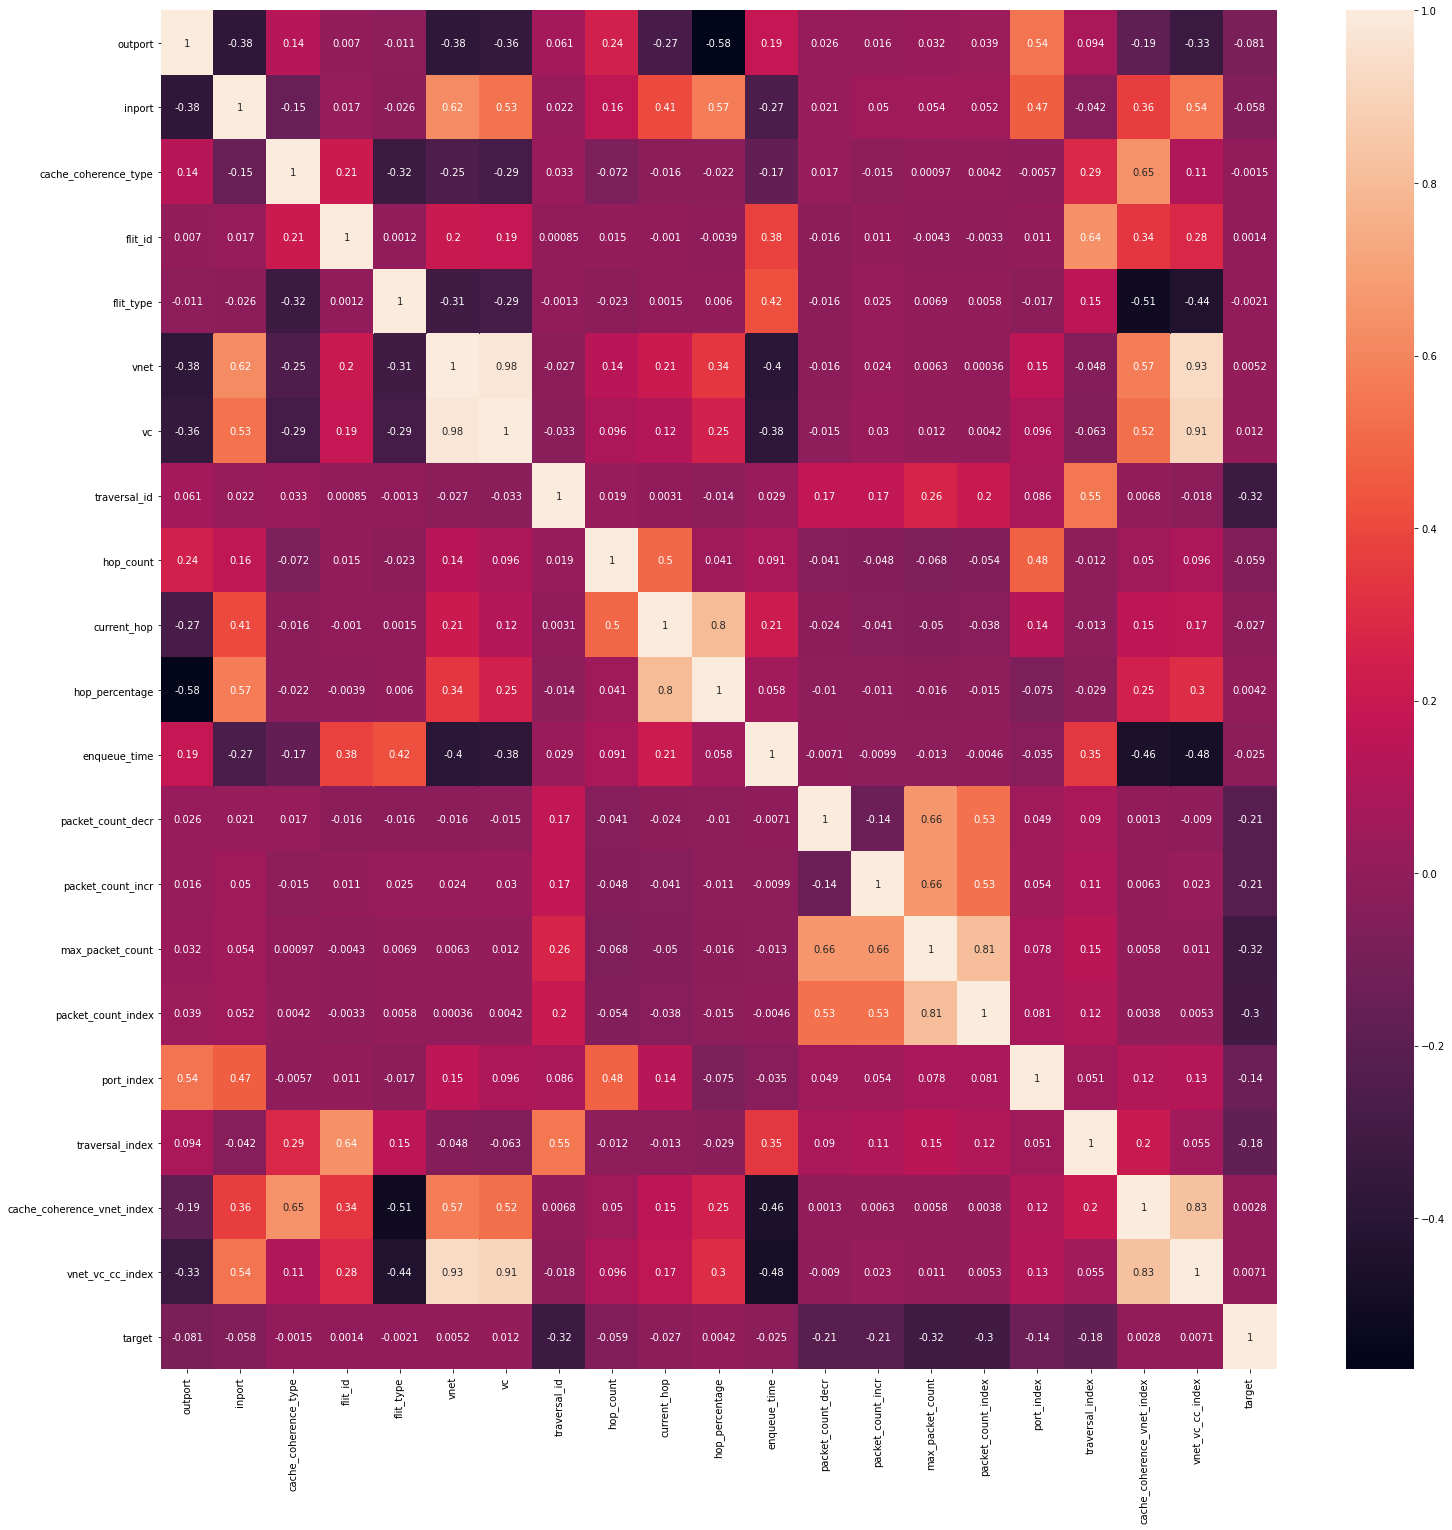

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

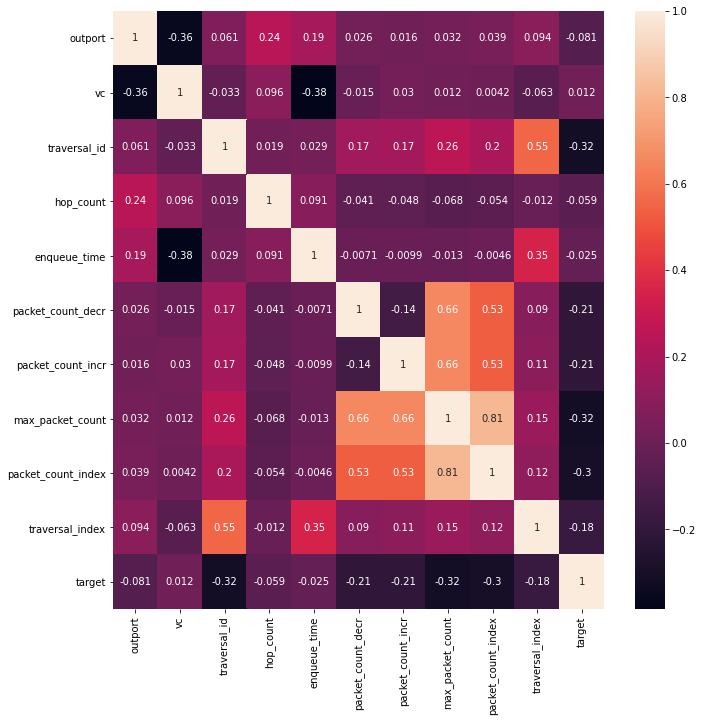

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

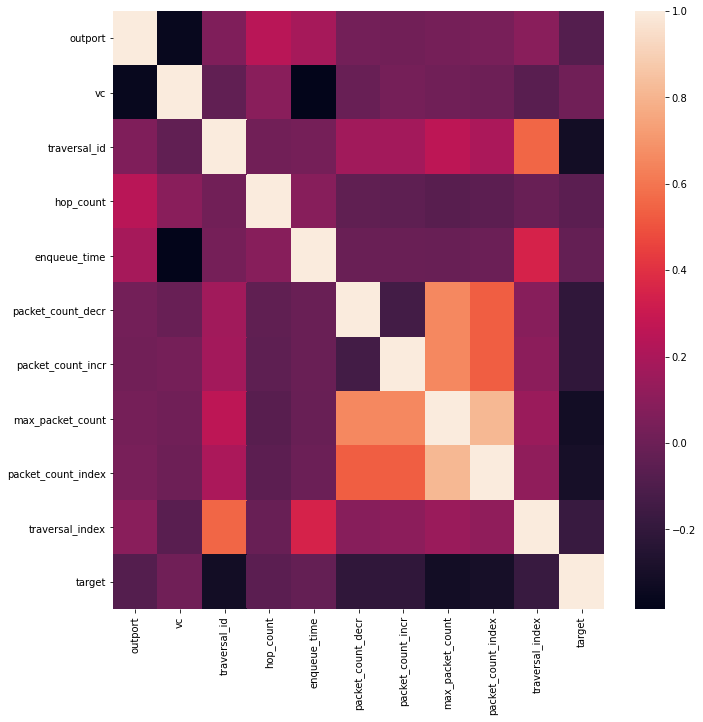

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.6,0.000000,0.331010,0.000000,0.331010,0.004550,0.000000e+00
1,0.50,0.000000,0.000017,0.6,0.000000,0.362369,0.000000,0.362369,0.004981,7.382201e-07
2,1.00,0.000000,0.000083,0.6,0.125000,0.358885,0.003484,0.362369,0.009914,3.691101e-06
3,0.00,0.888889,0.000000,0.6,0.187500,0.327526,0.003484,0.331010,0.009052,0.000000e+00
4,0.00,0.888889,0.000000,0.6,0.203125,0.324042,0.006969,0.331010,0.013458,6.643981e-06
...,...,...,...,...,...,...,...,...,...,...
296090,0.75,0.111111,0.999917,1.0,0.625000,0.000000,0.020906,0.020906,0.000287,4.444897e-02
296091,1.00,0.000000,1.000000,0.6,0.125000,0.010453,0.000000,0.010453,0.000144,6.668010e-02
296092,1.00,0.000000,1.000000,0.6,0.234375,0.006969,0.003484,0.010453,0.000239,2.667271e-01
296093,1.00,0.000000,1.000000,0.6,0.343750,0.003484,0.006969,0.010453,0.000239,4.000917e-01


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.6,0.000000,0.394636,0.000000,0.394636,0.005957,0.000000
1,0.00,0.888889,0.000000,0.6,0.171429,0.390805,0.003831,0.394636,0.011856,0.000000
2,0.00,0.888889,0.000000,0.6,0.185714,0.386973,0.007663,0.394636,0.017639,0.000009
3,0.00,0.888889,0.000000,0.6,0.200000,0.383142,0.011494,0.394636,0.023307,0.000015
4,0.50,0.888889,0.000050,0.6,0.057143,0.379310,0.015326,0.394636,0.028859,0.000002
...,...,...,...,...,...,...,...,...,...,...
166841,0.75,0.000000,0.999983,1.0,0.271429,0.015326,0.003831,0.019157,0.000521,0.222249
166842,0.75,0.000000,0.999983,1.0,0.371429,0.011494,0.007663,0.019157,0.000636,0.333376
166843,0.75,0.000000,0.999983,1.0,0.471429,0.007663,0.011494,0.019157,0.000636,0.444502
166844,0.75,0.000000,0.999983,1.0,0.571429,0.003831,0.015326,0.019157,0.000521,0.833444


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    174299
1    121796
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  3297.044156
8  packet_count_index  3045.908731
7    max_packet_count  2592.641610
5   packet_count_decr  1301.553216
6   packet_count_incr  1291.100875
9     traversal_index  1052.634756
0             outport   382.470243
3           hop_count    70.926564
4        enqueue_time    13.374537
1                  vc    11.860648


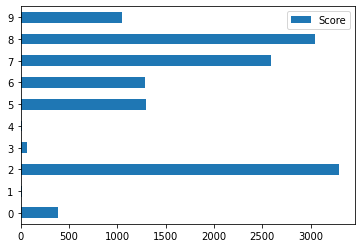

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.98218597359653
Test Prediction Score 97.50286556410677


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.65475947880081
Test Prediction Score 87.00052132846761
Test Prediction Score 86.61841401247669
Test Prediction Score 84.60148190846753
Test Prediction Score 82.91639402023456


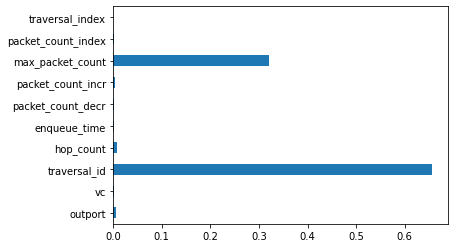

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

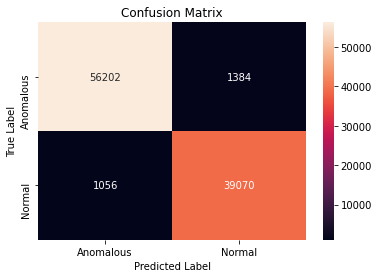

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     57586
           1       0.97      0.97      0.97     40126

    accuracy                           0.98     97712
   macro avg       0.97      0.97      0.97     97712
weighted avg       0.98      0.98      0.98     97712



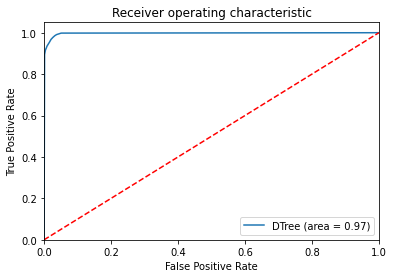

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r9-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.90686916653021


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.20017261426705
Test Prediction Score 87.60403569566684
Test Prediction Score 87.07115012611935
Test Prediction Score 85.70750921689424
Test Prediction Score 82.03364876428247


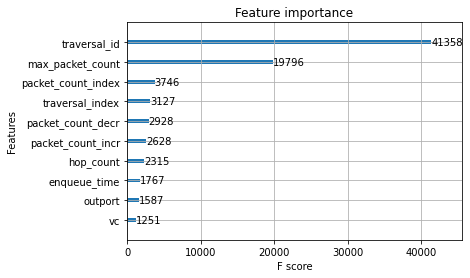

In [47]:
plot_importance(xgbc)
plt.show()

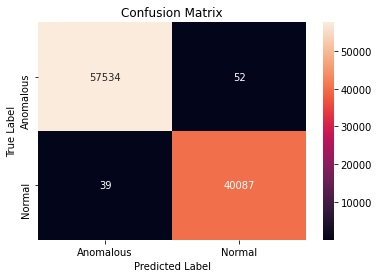

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57586
           1       1.00      1.00      1.00     40126

    accuracy                           1.00     97712
   macro avg       1.00      1.00      1.00     97712
weighted avg       1.00      1.00      1.00     97712



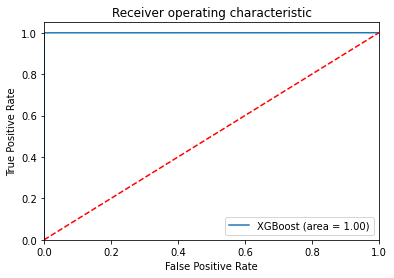

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()